<a href="https://colab.research.google.com/github/joelcapistrano/cifar10-cnn/blob/master/CIFAR10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Convolutional Neural Network for CIFAR10**

In [0]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import cifar10

Load CIFAR10 dataset and prepare training/test sets

In [0]:
# Load CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Get number of labels
num_labels = len(np.unique(y_train))

# Convert labels to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Get image dimension (image is assumed to be square)
image_size = x_train.shape[1]

# Resize image and normalize
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

Set network parameters that will be used by CNN

In [0]:
# Image is processed as is (Square RGB)
input_shape = (image_size, image_size, 3)
batch_size = 128
kernel_size = 3
pool_size = 2
filters = 64
dropout = 0.2

The CNN Architecture has **three Conv2D layers** using the same set of parameters (filter, kernel size, and activation function)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
____

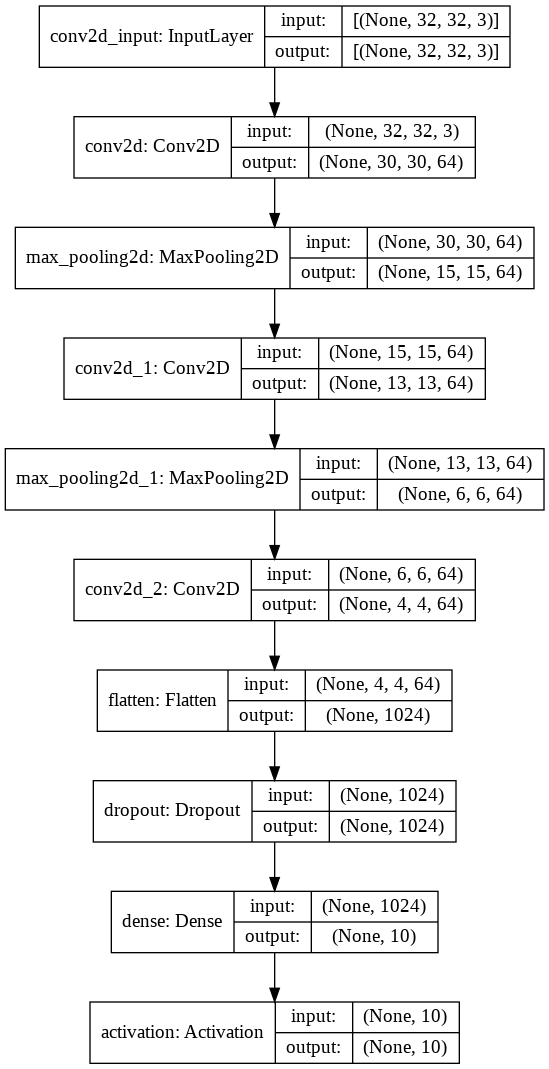

In [5]:
# CNN Architecture
# Conv2D-Conv2D-Conv2D-Flatten-Dense-Activation
model = Sequential()
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu'))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu'))
model.add(Flatten())
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()
plot_model(model, to_file='cnn-cifar10.png', show_shapes=True)

The CNN is trained over **200 epochs**. For every 20th epoch, Training & Test Data Accuracies are generated for evaluation. **Categorical Crossentropy** is chosen as the loss function and **Accuracy** is chosen as the metric since the CNN will perform **single label classification** (i.e. only one label can be correct).

In [6]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

# Train the CNN
i = 1
epoch = 20
epoch_num = []
train_acc = []
test_acc = []
while i <= 10:
  epoch_num.append(epoch * i)
  model.fit(x_train, y_train, epochs=20, batch_size=batch_size)
  train_score = model.evaluate(x_train, y_train, batch_size=batch_size)
  print("\nTrain accuracy: %.1f%%" % (100.0 * train_score[1]))
  train_acc.append(train_score[1])
  test_score = model.evaluate(x_test, y_test, batch_size=batch_size)
  print("\nTest accuracy: %.1f%%" % (100.0 * test_score[1]))
  test_acc.append(test_score[1])
  i = i + 1

Epoch 1/20
50000/50000 [==============================] - 7s 143us/sample - loss: 1.6621 - acc: 0.3895
Epoch 2/20
50000/50000 [==============================] - 6s 119us/sample - loss: 1.3284 - acc: 0.5244
Epoch 3/20
50000/50000 [==============================] - 6s 120us/sample - loss: 1.1950 - acc: 0.5810
Epoch 4/20
50000/50000 [==============================] - 6s 118us/sample - loss: 1.0925 - acc: 0.6184
Epoch 5/20
50000/50000 [==============================] - 6s 118us/sample - loss: 1.0164 - acc: 0.6455
Epoch 6/20
50000/50000 [==============================] - 6s 119us/sample - loss: 0.9602 - acc: 0.6655
Epoch 7/20
50000/50000 [==============================] - 6s 118us/sample - loss: 0.9137 - acc: 0.6829
Epoch 8/20
50000/50000 [==============================] - 6s 120us/sample - loss: 0.8743 - acc: 0.6958
Epoch 9/20
50000/50000 [==============================] - 6s 119us/sample - loss: 0.8412 - acc: 0.7070
Epoch 10/20
50000/50000 [==============================] - 6s 119us/sampl

The model's Training and Test Data Accuracy is plotted against the number of epochs performed during training. Looking at the plot, it can be observed that **as the number of epochs increase, Training Data Accuracy increases**. On the other hand, **Test Data Accuracy gradually decreases after 40 epochs**, indicating **model overfitting**.

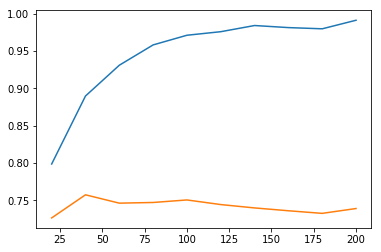

In [7]:
# Generate plot showing Training & Test Data Accuracy
plt.plot(epoch_num, train_acc)
plt.plot(epoch_num, test_acc)
plt.show()

In [8]:
# Generate table showing Training & Test Data Accuracy
df = pd.DataFrame(pd.concat([pd.Series(epoch_num),pd.Series(train_acc),pd.Series(test_acc)], axis=1))
df.columns = ['Epoch','Training Data Accuracy','Test Data Acccuracy']
df

,Epoch,Training Data Accuracy,Test Data Acccuracy
0,20,0.79860,0.7263
1,40,0.88980,0.7573
2,60,0.93108,0.7461
3,80,0.95834,0.7470
4,100,0.97130,0.7504
5,120,0.97606,0.7442
6,140,0.98434,0.7397
7,160,0.98156,0.7359
8,180,0.97994,0.7324
9,200,0.99142,0.7389


**CNN was able to generate higher Test Data Accuracy than MLP (MLP @ 53.40%, CNN @ 75.04%)**. CNN's method of extracting features from the image (Conv2D, Max Pooling) allows **highly distinctive areas of the image to standout**. This ability to develop an internal representation of a two-dimensional image makes CNN more efficient at training and ultimately better at making predictions than MLP when it comes to **image data**.